# Seeed Dataset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('./seeds_dataset.csv')
df=df.sample(frac=0.5,random_state=3)
df=df.drop("ID",axis=1)
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,3
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,2
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,2
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
128,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,2


In [67]:
df['seedType'].value_counts()

2    38
1    36
3    31
Name: seedType, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 164 to 65
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  105 non-null    float64
 1   perimeter             105 non-null    float64
 2   compactness           105 non-null    float64
 3   lengthOfKernel        105 non-null    float64
 4   widthOfKernel         105 non-null    float64
 5   asymmetryCoefficient  105 non-null    float64
 6   lengthOfKernelGroove  105 non-null    float64
 7   seedType              105 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


In [69]:
df=df.sample(frac=1,random_state=3)
y=df['seedType']
x=df.drop('seedType',axis=1)

In [70]:
df['seedType'].value_counts()

2    38
1    36
3    31
Name: seedType, dtype: int64

<AxesSubplot:>

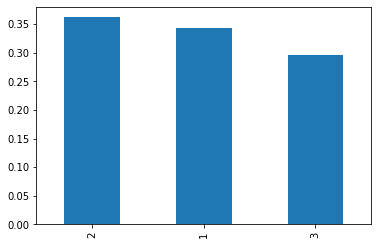

In [71]:
df['seedType'].value_counts(normalize=True).plot.bar()

In [72]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,14.974286,14.596857,0.873644,5.636800,3.278933,3.578116,5.421095,1.952381
std,2.988076,1.357379,0.022177,0.466863,0.378172,1.505428,0.511804,0.801212
min,10.590000,12.410000,0.809900,4.899000,2.630000,0.765100,4.607000,1.000000
25%,12.460000,13.380000,0.862500,5.224000,2.967000,2.270000,5.046000,1.000000
50%,14.920000,14.520000,0.877900,5.563000,3.312000,3.600000,5.219000,2.000000
75%,17.260000,15.730000,0.888300,6.017000,3.562000,4.677000,5.879000,3.000000
max,20.970000,17.250000,0.910800,6.675000,4.032000,8.315000,6.550000,3.000000


# Building predictive algorithm using random forest

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)



In [74]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(x)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]


y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))



Confusion Matrix - Test: 
 [[12  1  1]
 [ 0  8  0]
 [ 2  0  8]]


Overall Accuracy - Test:  0.875


# Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trains,y_train)

GaussianNB()

In [79]:
y_train_pred = gnb.predict(X_trains)
y_train_prob = gnb.predict_proba(X_trains)[:,1]


y_test_pred = gnb.predict(X_tests)
y_test_prob = gnb.predict_proba(X_tests)[:,1]

import pickle
pickle_out = open("gnb.pkl","wb")
pickle.dump(gnb, pickle_out)
pickle_out.close()

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))



Confusion Matrix - Test: 
 [[12  1  1]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  0.9375


# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,5)}

rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,n_iter=50,return_train_score=True,random_state=3,n_jobs=-1)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022DFF4C2280>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022DFF525DF0>},
                   random_state=3, return_train_score=True)

In [81]:
rsearch_knn.best_params_

{'n_neighbors': 11, 'p': 4}

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve


knn=KNeighborsClassifier(**rsearch_knn.best_params_)

# done above
knn.fit(X_trains,y_train)
y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]


y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

import pickle
pickle_out = open("knn.pkl","wb")
pickle.dump(gnb, pickle_out)
pickle_out.close()



print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification Report-Test: \n', classification_report(y_test,y_test_pred))
#print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))




Confusion Matrix - Test: 
 [[13  1  0]
 [ 0  8  0]
 [ 1  0  9]]


Overall Accuracy - Test:  0.9375
Classification Report-Test: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.89      1.00      0.94         8
           3       1.00      0.90      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



# Clustering

In [84]:
from sklearn.cluster import KMeans

In [85]:
model = KMeans(n_clusters = 3)

In [86]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)

In [87]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

C:\Users\shail\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,840.000000
1,2,438.378315
2,3,228.755452
3,4,192.189330
4,5,162.260547
5,6,142.254771
6,7,126.856641
7,8,112.308210
8,9,101.264028


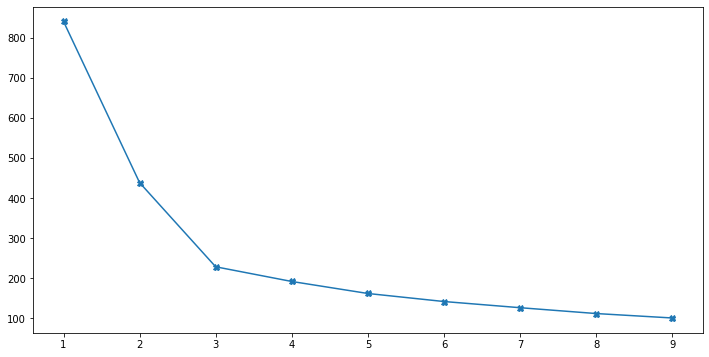

In [89]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "X" )

In [90]:
kmeans=KMeans(n_clusters=3, n_init=15,random_state=3)

In [91]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=3)

In [92]:
centroids=kmeans.cluster_centers_

In [93]:
pd.DataFrame(centroids,columns=df.columns)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,-1.117311,-1.104463,-0.990012,-1.019310,-1.173524,0.771988,-0.683586,1.313813
1,-0.206005,-0.239899,0.479297,-0.318339,-0.050527,-0.712501,-0.696048,-1.159540
2,1.106653,1.128282,0.353571,1.133127,1.005216,0.045221,1.217076,0.026716


In [94]:
df_scaled['Class']=kmeans.labels_.astype('object')

In [95]:
df_scaled['Class'].value_counts()

2    38
1    36
0    31
Name: Class, dtype: int64

In [96]:
df_k=df_scaled.copy()
df_k.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,Class
201,-0.774859,-0.945190,1.089960,-1.404976,-0.382429,-0.853077,-1.327340,1.313813,0
58,0.136429,0.128169,0.546253,0.054236,0.372155,-1.053979,-0.390872,-1.194376,1
101,1.014090,0.935038,1.157924,0.544945,1.102826,-1.007925,0.816522,0.059719,2
35,0.385268,0.298425,1.194171,0.155391,0.547516,-0.873101,0.043004,-1.194376,1
71,0.627381,0.794391,-0.513976,0.777386,0.544859,0.732114,0.895052,0.059719,2


In [97]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\shail\AppData\Local\Temp\ipykernel_21932\3451340.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
C:\Users\shail\AppData\Local\Temp\ipykernel_21932\3451340.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=la

Text(0.5, 0.92, '3D plot of KMeans Clustering')

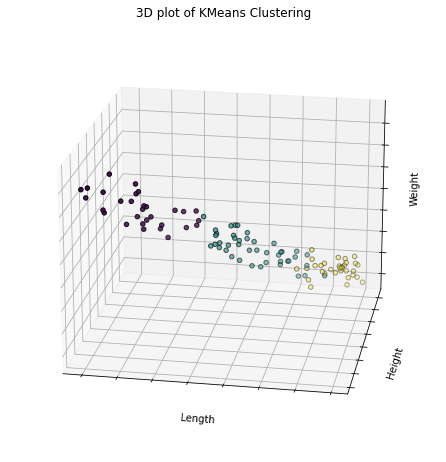

In [98]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [99]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

In [100]:
df_h

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,label
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3,1
58,15.38,14.77,0.8857,5.662,3.419,1.999,5.222,1,0
101,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,2
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,0
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2,0
...,...,...,...,...,...,...,...,...,...
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,3,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0
175,10.80,12.57,0.8590,4.981,2.821,4.773,5.063,3,1
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3,1


In [101]:
print('K-Means Predicted Data Classes:')
print(df_k['Class'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['label'].value_counts())

K-Means Predicted Data Classes:
2    38
1    36
0    31
Name: Class, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    51
1    31
2    23
Name: label, dtype: int64


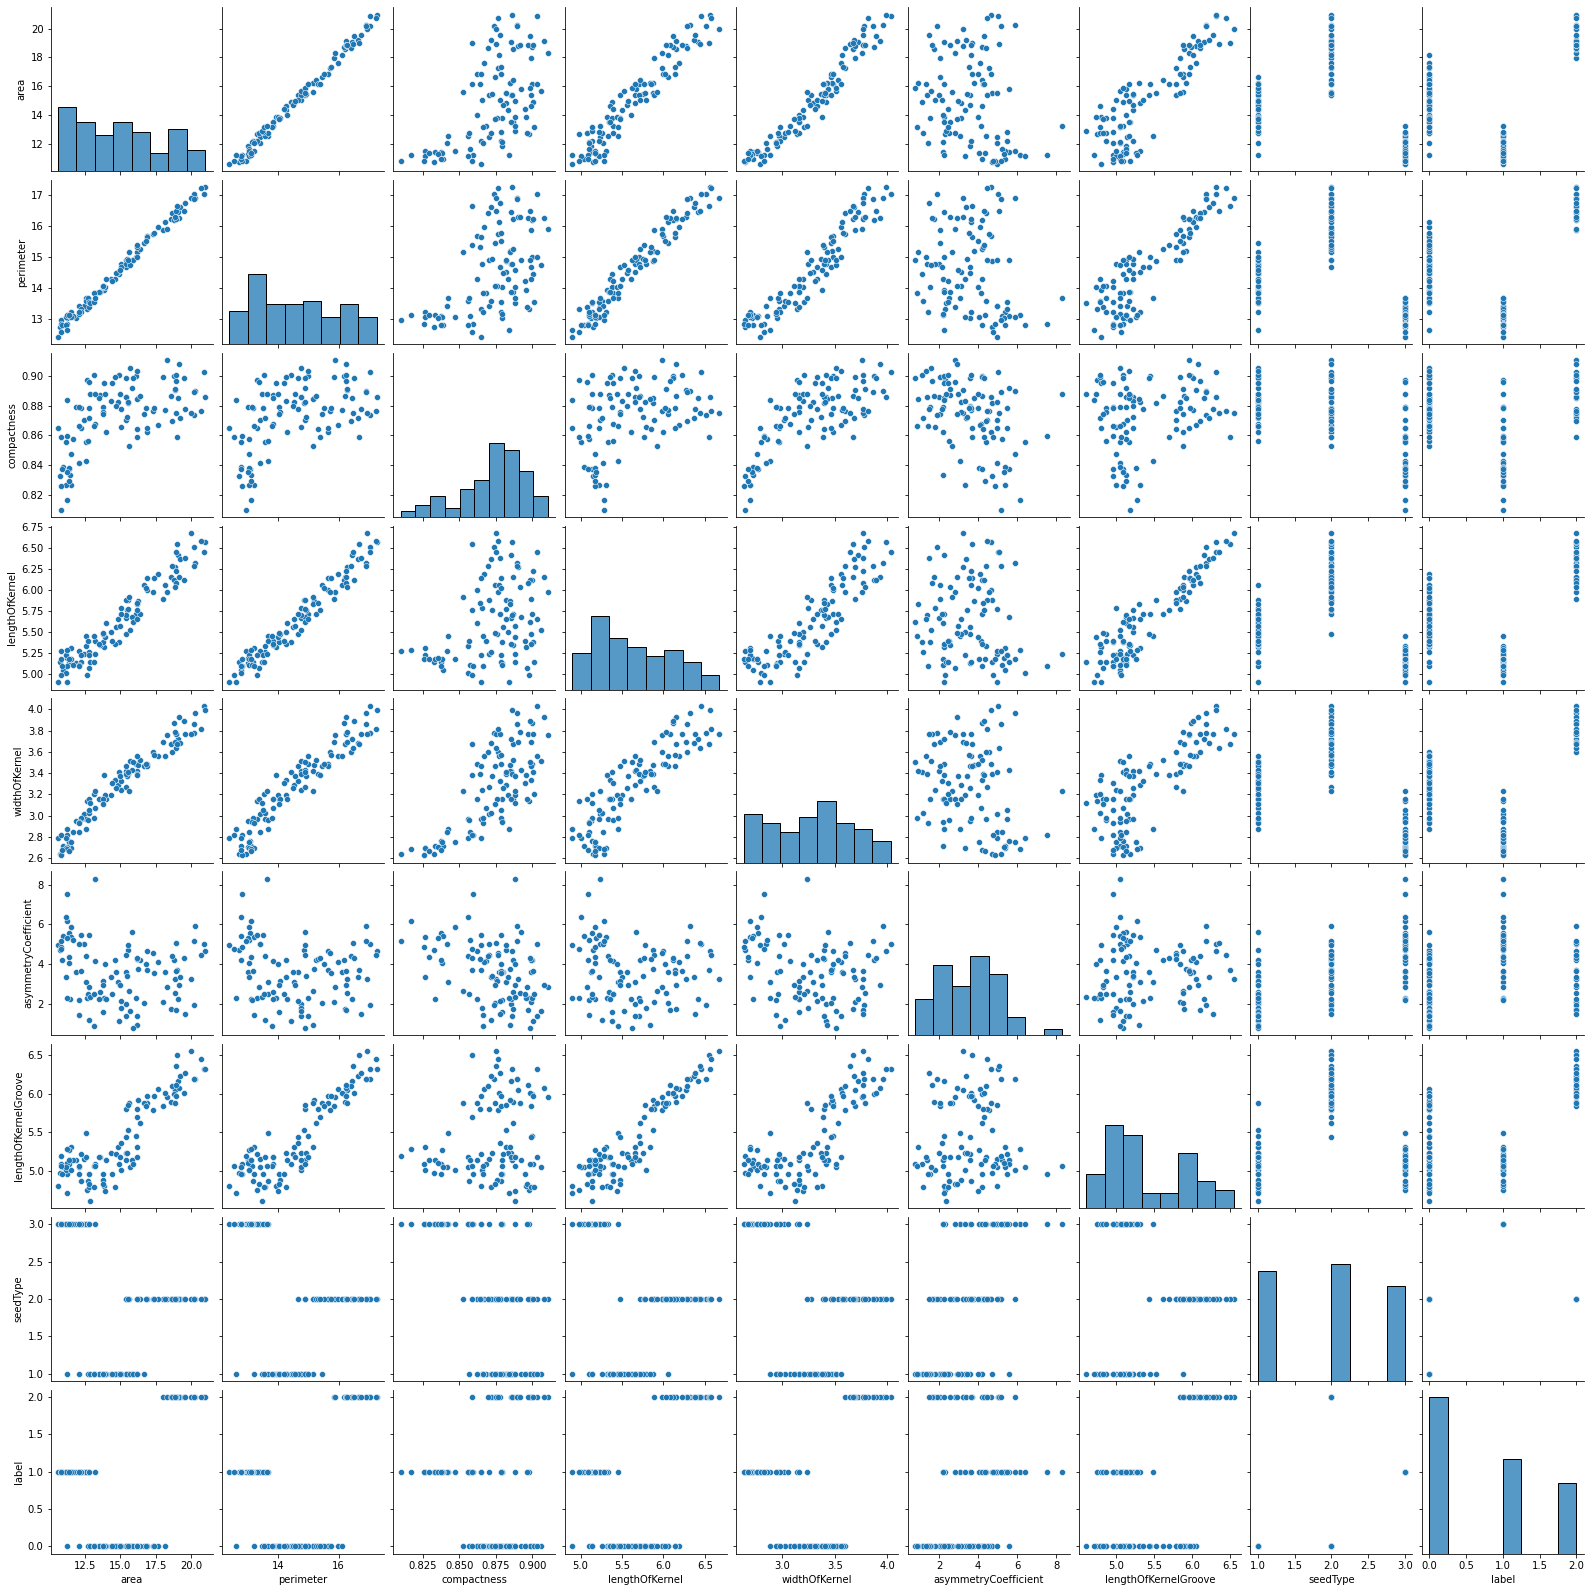

In [103]:
sns.pairplot(df_h)